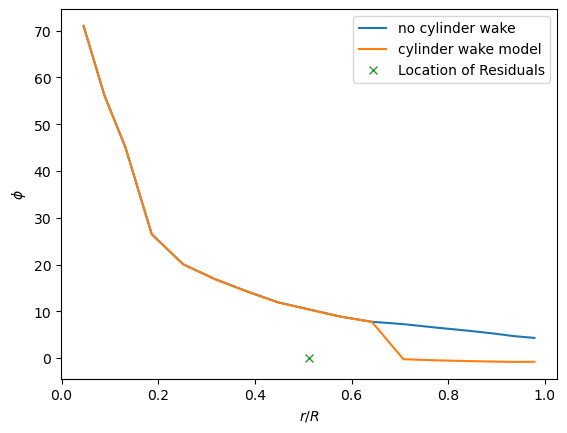

PyObject <matplotlib.legend.Legend object at 0x7fe4da1eba30>

In [89]:
using CCBlade
using PyPlot

Rhub = 1.5
Rtip = 63.0
B = 3
hubHt = 90.0

r = [2.8667, 5.6000, 8.3333, 11.7500, 15.8500, 19.9500, 24.0500,
    28.1500, 32.2500, 36.3500, 40.4500, 44.5500, 48.6500, 52.7500,
    56.1667, 58.9000, 61.6333]
chord = [3.542, 3.854, 4.167, 4.557, 4.652, 4.458, 4.249, 4.007, 3.748,
    3.502, 3.256, 3.010, 2.764, 2.518, 2.313, 2.086, 1.419]
theta = pi/180*[13.308, 13.308, 13.308, 13.308, 11.480, 10.162, 9.011, 7.795,
    6.544, 5.361, 4.188, 3.125, 2.319, 1.526, 0.863, 0.370, 0.106]


aftypes = Array{AlphaAF}(undef, 8)
aftypes[1] = AlphaAF("../../data/Cylinder1.dat", radians=false)
aftypes[2] = AlphaAF("../../data/Cylinder2.dat", radians=false)
aftypes[3] = AlphaAF("../../data/DU40_A17.dat", radians=false)
aftypes[4] = AlphaAF("../../data/DU35_A17.dat", radians=false)
aftypes[5] = AlphaAF("../../data/DU30_A17.dat", radians=false)
aftypes[6] = AlphaAF("../../data/DU25_A17.dat", radians=false)
aftypes[7] = AlphaAF("../../data/DU21_A17.dat", radians=false)
aftypes[8] = AlphaAF("../../data/NACA64_A17.dat", radians=false)

af_idx = [1, 1, 2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8]


                                 #9  10 11 12 13  
# create airfoil array
airfoils = aftypes[af_idx]
tilt = 0.0*pi/180     #the original value is 5.0 (positive means upwards)
yaw = 0.0*pi/180
shearExp = 0.0

Vinf = 10.0
tsr = 7.55
azimuth = 0.0*pi/180
rho = 1.225
pitch = 0.0

# Negative Cone Glitch with Residual Issue

# isp = [9, 10, 11, 12, 13]
isp = [9]
#negative precone
precone = -2.5*pi/180

#recompute what we need:
sections = Section.(r, chord, theta, airfoils, precone)

rotor_nowake = Rotor(Rhub, Rtip, B; precone=precone, turbine=true, wakeCyl=false)
rotor_wake = Rotor(Rhub, Rtip, B; precone=precone, turbine=true, wakeCyl=true)

rotorR = Rtip*cos(precone)
Omega = Vinf*tsr/rotorR

op = windturbine_op.(Vinf, Omega, pitch, r, precone, yaw, tilt, azimuth, hubHt, shearExp, rho)


# -- solve --

Rtype=1 # 1 is default
sol_nowake = solve.(Ref(rotor_nowake), sections, op,trial=1)
sol_wake = solve.(Ref(rotor_wake), sections, op,trial=Rtype)


plot(r/Rtip, sol_nowake.phi.*180. /pi,label="no cylinder wake")

plot(r/Rtip, sol_wake.phi.*180. /pi,label="cylinder wake model")
plot(r[isp]/Rtip,zeros(length(isp)),"x",label="Location of Residuals")
xlabel(L"r/R")
ylabel(L"\phi")

legend()


In [98]:

# -- residual --

#creating phi vector refined near 0
nn = 1000
p1 = range(-180.,-1.,length=1000)
p2 = range(-1,1.,length=nn)
phi = vcat(p1[1:end-1],p2,-p1[end-1:-1:1])
# phi = range(-1,90,8000)

Res_wake = zero(phi)
Res_nowake = zero(phi)
ap_wake = zero(phi)
a_wake = zero(phi)
Un_wake = zero(phi)
Ut_wake = zero(phi)
ap= zero(phi)
Vy= zero(phi)
b1= zero(phi)
b2= zero(phi)
p3= zero(phi)
kplhs=zero(phi)
print("Computing residuals now")
# compute and plot the residual
for i =1:length(phi)
    phii = phi[i].*pi/180
#     a=rotor_wake
#     b = sections[isp]
#     c = op[isp]
#     d = Rtype
    CCsol = residual(phii, rotor_wake, sections[isp], op[isp],trial=Rtype)
#     Res_nowake[i] = CCBlade.residual(phi[i].* pi/180, rotor_nowake, sections[isp], op[isp],trial=1)[1]
#     Res_wake[i] = CCsol[1]
#     ap_wake[i]  = CCsol[2].ap
#     a_wake[i]  = CCsol[2].a
#     Un_wake[i] = CCsol[3]
#     Ut_wake[i] = CCsol[4]

#     ap[i]= CCsol[5]
#     Vy[i]= CCsol[6]
#     b1[i]= CCsol[7]
#     b2[i]= CCsol[8]
#     p3[i]= CCsol[9]
#     kplhs[i]=CCsol[10]



end

Computing residuals now

LoadError: type Array has no field r

In [73]:
# using PyPlot
# using Formatting
'''



# -- residual --

#creating phi vector refined near 0
nn = 1000
p1 = range(-180.,-1.,length=1000)
p2 = range(-1,1.,length=nn)
phi = vcat(p1[1:end-1],p2,-p1[end-1:-1:1])
# phi = range(-1,90,8000)

Res_wake = zero(phi)
Res_nowake = zero(phi)
ap_wake = zero(phi)
a_wake = zero(phi)
Un_wake = zero(phi)
Ut_wake = zero(phi)
ap= zero(phi)
Vy= zero(phi)
b1= zero(phi)
b2= zero(phi)
p3= zero(phi)
kplhs=zero(phi)
print("Computing residuals now")
# compute and plot the residual
for i =1:length(phi)
    CCsol = CCBlade.residual(phi[i].* pi/180, rotor_wake, sections[isp], op[isp],trial=Rtype)
    Res_nowake[i] = CCBlade.residual(phi[i].* pi/180, rotor_nowake, sections[isp], op[isp],trial=1)[1]
    Res_wake[i] = CCsol[1]
    ap_wake[i]  = CCsol[2].ap
    a_wake[i]  = CCsol[2].a
    Un_wake[i] = CCsol[3]
    Ut_wake[i] = CCsol[4]

    ap[i]= CCsol[5]
    Vy[i]= CCsol[6]
    b1[i]= CCsol[7]
    b2[i]= CCsol[8]
    p3[i]= CCsol[9]
    kplhs[i]=CCsol[10]



end


figure()
plot(phi,Res_nowake,label="Residual (nowake)",linewidth=2,linestyle="--")
plot(phi,Res_wake,label="Residual (wake)",linestyle="--")
plot(sol_nowake[isp].phi.* 180/pi, 0.,"x", label="Nowake Solution")
plot(sol_wake[isp].phi.* 180/pi, 0.,"x", label="Wake Solution")
plot(phi,ap_wake,label=L"a^\prime (wake)")
plot(phi,a_wake,label=L"a (wake)")
plot(phi,Un_wake,label=L"U_n (wake)")
plot(phi,Ut_wake,label=L"U_t (wake)")
plot(phi,ap,label=L"ap (wake)")
plot(phi,Vy,label=L"Vy (wake)")
plot(phi,b1,label=L"b1 (wake)")
plot(phi,b2,label=L"b2 (wake)")
plot(phi,p3,label=L"p3 (wake)")
plot(phi,kplhs,label="kplhs (wake)")
plot([-180,180],[0,0],color = "black",linestyle ="dashdot")

xlabel(L"\phi (degrees")
ylabel(L"residual")

ylim([-.5,1.2])
xlim([-2,6])
legend()

# show()
# savefig(fname) # hide
'''


Computing residuals now

LoadError: type Array has no field r